Loading processed data...
Data Shape: (25192, 8)


C:\Users\Jemar John\AppData\Local\Temp\ipykernel_26240\1484872741.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_top, y='Class', order=top_classes, palette='viridis')


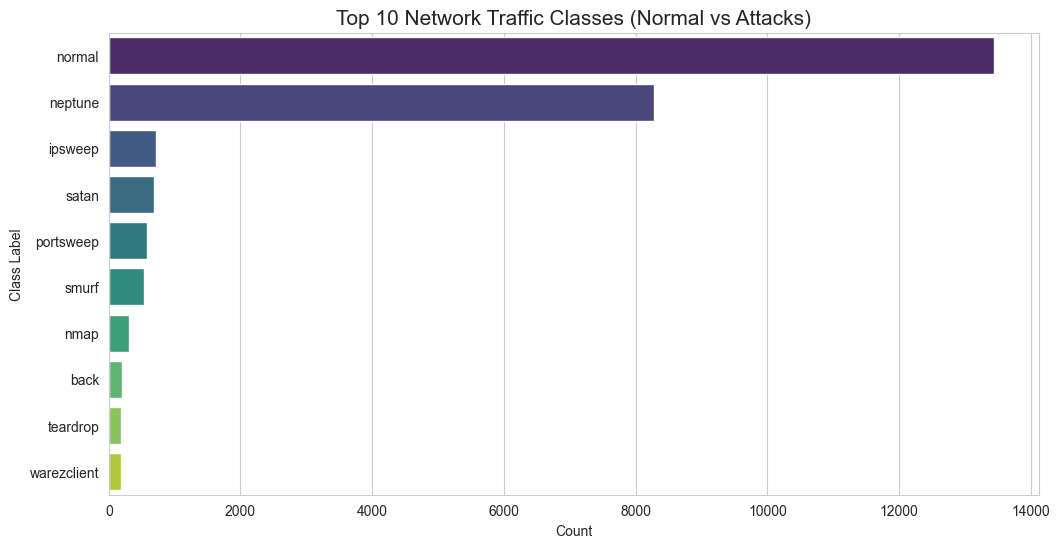

✅ Saved: 01_class_distribution.png


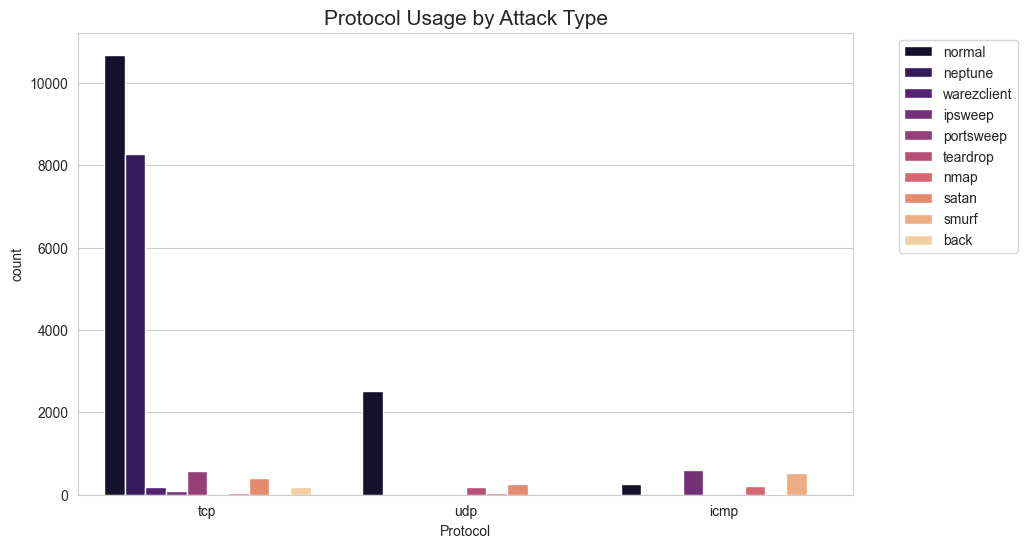

✅ Saved: 02_protocol_attack_breakdown.png

Generating Heatmap (this might take a moment)...


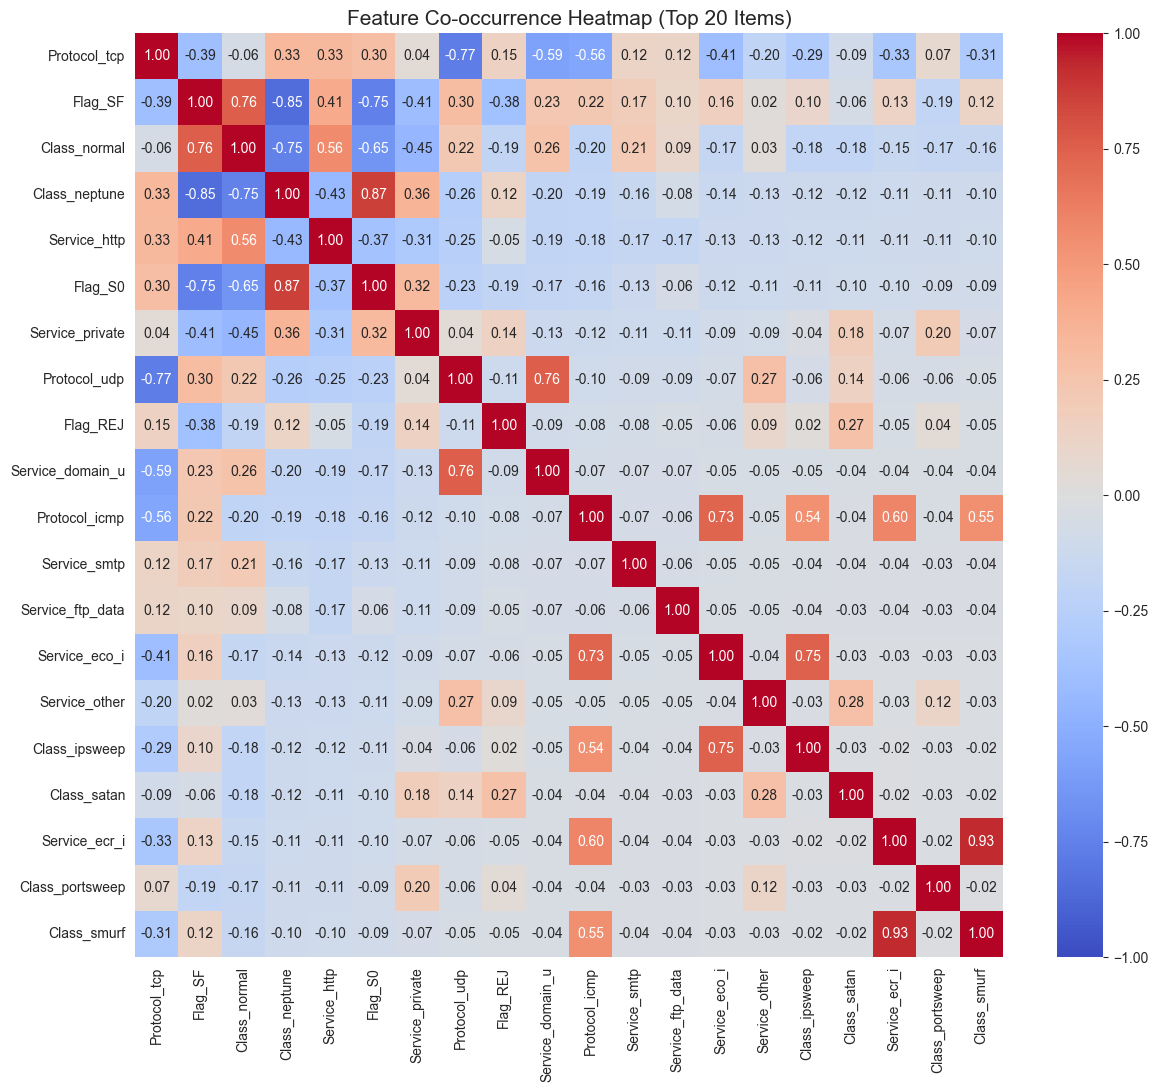

✅ Saved: 03_cooccurrence_heatmap.png


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
INPUT_PATH = '../data/processed_data.csv'
FIGURE_PATH = '../results/plots'

# Create results folder if it doesn't exist
import os
if not os.path.exists(FIGURE_PATH):
    os.makedirs(FIGURE_PATH)

def run_eda():
    print("Loading processed data...")
    df = pd.read_csv(INPUT_PATH)
    print(f"Data Shape: {df.shape}")
    
    # Set the visual style
    sns.set_style("whitegrid")
    
    # ==========================================
    # 1. Target Variable Distribution (Bar Chart)
    # ==========================================
    plt.figure(figsize=(12, 6))
    # Get top 10 most frequent classes (Normal + Top 9 attacks)
    top_classes = df['Class'].value_counts().nlargest(10).index
    df_top = df[df['Class'].isin(top_classes)]
    
    ax = sns.countplot(data=df_top, y='Class', order=top_classes, palette='viridis')
    plt.title('Top 10 Network Traffic Classes (Normal vs Attacks)', fontsize=15)
    plt.xlabel('Count')
    plt.ylabel('Class Label')
    
    # Save
    plt.savefig(f"{FIGURE_PATH}/01_class_distribution.png", bbox_inches='tight')
    plt.show()
    print("✅ Saved: 01_class_distribution.png")

    # ==========================================
    # 2. Protocol vs Attack Type (Grouped Bar Chart)
    # ==========================================
    # We want to see: "Does DoS use TCP or UDP?"
    plt.figure(figsize=(10, 6))
    
    # Filter for top attacks only to keep chart readable
    sns.countplot(data=df_top, x='Protocol', hue='Class', palette='magma')
    plt.title('Protocol Usage by Attack Type', fontsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Save
    plt.savefig(f"{FIGURE_PATH}/02_protocol_attack_breakdown.png", bbox_inches='tight')
    plt.show()
    print("✅ Saved: 02_protocol_attack_breakdown.png")

    # ==========================================
    # 3. Correlation Heatmap (Co-occurrence)
    # ==========================================
    # This is CRITICAL for Association Mining. It shows which items appear together.
    # Since data is categorical, we must One-Hot Encode a subset to correlate them.
    
    print("\nGenerating Heatmap (this might take a moment)...")
    
    # Select columns that are likely to have strong rules
    subset_cols = ['Protocol', 'Service', 'Flag', 'Class']
    
    # We create dummy variables (One-Hot Encoding) just for visualization
    df_encoded = pd.get_dummies(df[subset_cols])
    
    # Calculate Correlation Matrix (Pearson correlation implies co-occurrence here)
    # We filter to only keep the top 20 features to prevent a messy giant grid
    top_features = df_encoded.sum().nlargest(20).index
    corr_matrix = df_encoded[top_features].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Feature Co-occurrence Heatmap (Top 20 Items)', fontsize=15)
    
    # Save
    plt.savefig(f"{FIGURE_PATH}/03_cooccurrence_heatmap.png", bbox_inches='tight')
    plt.show()
    print("✅ Saved: 03_cooccurrence_heatmap.png")

if __name__ == "__main__":
    run_eda()